<a href="https://colab.research.google.com/github/Sedighe-Raeisi/Tumor_Object_Detection/blob/main/Tumor_Object_Detection_Yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python -m pip install --upgrade pip

!pip install tensorflow==2.3.1 

!pip install tensorboard==2.4.1
!pip install torch  #YOLOv5 runs on top of PyTorch, so we need to import it to the notebook

In [13]:
import os

In [3]:
import torch

In [4]:
from IPython.display import Image

In [5]:
!git clone https://github.com/ultralytics/yolov5


Cloning into 'yolov5'...
remote: Enumerating objects: 10797, done.
remote: Total 10797 (delta 0), reused 0 (delta 0), pack-reused 10797
Receiving objects: 100% (10797/10797), 10.89 MiB | 17.79 MiB/s, done.
Resolving deltas: 100% (7457/7457), done.


In [6]:
%cd yolov5


/content/yolov5


In [ ]:
!pip install -r requirements.txt


#move and resize images:

In [ ]:
!unzip /content/drive/MyDrive/MachineLearing/tumor_Object_Detection/data.zip -d /content/data

In [9]:
import matplotlib.pyplot as plt

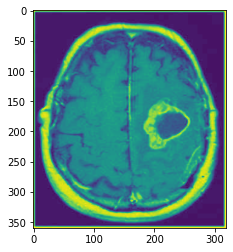

In [10]:
x=plt.imread('/content/data/data/Y10.jpg')
plt.imshow(x)

In [14]:
img_size=[]
for img in os.listdir('/content/data/data'):
  if img.endswith('.jpg') or img.endswith('.JPG'):
    x=plt.imread('/content/data/data/'+str(img))
    img_size+=[x.shape]


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([  3. ,  27.2,  51.4,  75.6,  99.8, 124. , 148.2, 172.4, 196.6,
        220.8, 245. ]),
 <a list of 10 Patch objects>)

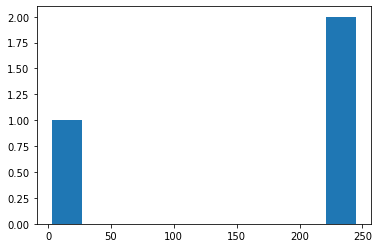

In [15]:
plt.hist(img_size[0])

(array([1., 0., 0., 0., 0., 0., 0., 1., 0., 1.]),
 array([  3. ,  38.1,  73.2, 108.3, 143.4, 178.5, 213.6, 248.7, 283.8,
        318.9, 354. ]),
 <a list of 10 Patch objects>)

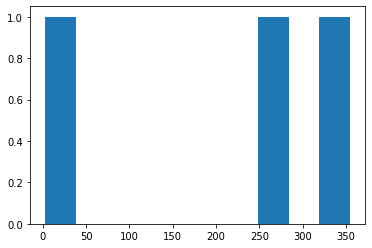

In [16]:
plt.hist(img_size[1])

In [17]:
import cv2

In [18]:
njpg=0
ntxt=0
nn=0
for img in os.listdir('/content/data/data'):
  if img.endswith('.jpg') or img.endswith('.JPG'):
    njpg+=1
  elif img.endswith('.txt'):
    ntxt+=1
  else:
    nn+=1
    print(img)

print(njpg,ntxt,nn)


Y92.png
154 154 1


In [20]:
import shutil

In [22]:
#I put this image for test:
shutil.move('/content/data/data/Y92.png','/content')
shutil.move('/content/data/data/Y92.jpg','/content')
shutil.move('/content/data/data/Y92.txt','/content')
shutil.copy('/content/Y92.jpg','/content/drive/MyDrive/MachineLearing/tumor_Object_Detection')


'/content/drive/MyDrive/MachineLearing/tumor_Object_Detection/Y92.jpg'

#Prepaire the train and val directories:

In [23]:
# import os
from random import choice
# import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = '/content/brain_tumor/dataset/images/train'
valPath = '/content/brain_tumor/dataset/images/val'
crsPath ='/content/data/data' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)

training images are :  122
Validation images are :  30


In [24]:
os.mkdir('/content/brain_tumor')
os.mkdir('/content/brain_tumor/dataset')
os.mkdir('/content/brain_tumor/dataset/images')
os.mkdir('/content/brain_tumor/dataset/labels')

In [25]:
trainimagePath = '/content/brain_tumor/dataset/images/train'
trainlabelPath = '/content/brain_tumor/dataset/labels/train'
valimagePath = '/content/brain_tumor/dataset/images/val'
vallabelPath = '/content/brain_tumor/dataset/labels/val'
os.mkdir(trainimagePath)
os.mkdir(trainlabelPath)
os.mkdir(valimagePath)
os.mkdir(vallabelPath)
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)



#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
shutil.move(crsPath, valPath)

'/content/brain_tumor/dataset/images/val/data'

#Train  the model:

In [ ]:
# move the dataset’s dataset.yaml file to the /content/yolov5/data directory

In [31]:
!python train.py --img 400 --batch 10 --epochs 40 --data dataset.yaml --weights yolov5s.pt --cache


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=40, batch_size=10, imgsz=400, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-224-g4c40933 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5,

#Validation

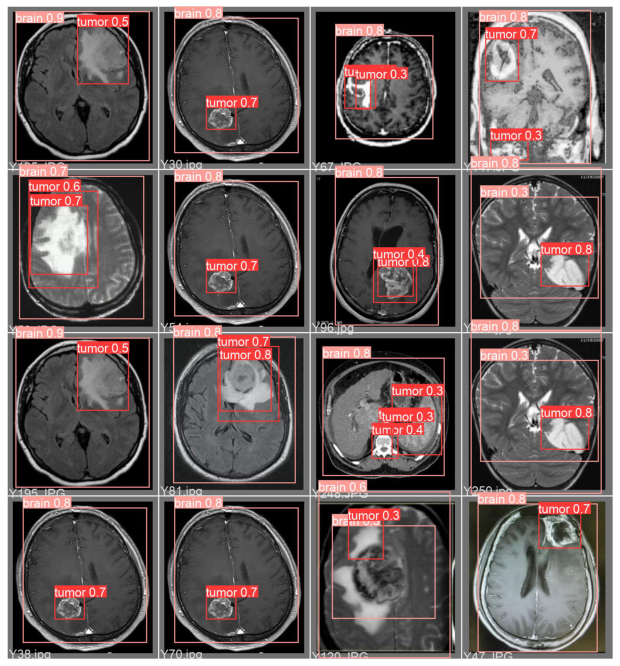

In [58]:
plt.figure(figsize=(12,12))
imgg=plt.imread('/content/yolov5/runs/train/exp2/val_batch2_pred.jpg')
plt.imshow(imgg);
plt.axis('off');

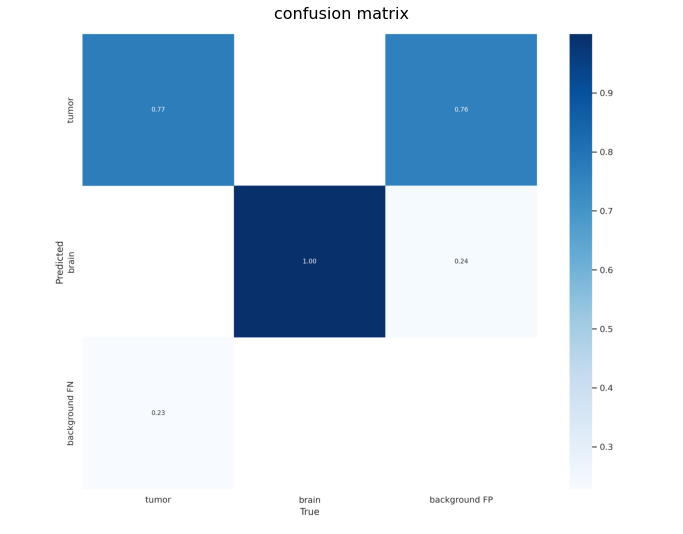

In [57]:
plt.figure(figsize=(12,12))
plt.title('confusion matrix',fontdict={'size':16})
xx=plt.imread('/content/yolov5/runs/train/exp2/confusion_matrix.png')
plt.imshow(xx);
plt.axis('off');

# Test the Model:

In [32]:
!python detect.py --source /content/drive/MyDrive/MachineLearing/tumor_Object_Detection/Y92.jpg --weights /content/yolov5/runs/train/exp2/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/MachineLearing/tumor_Object_Detection/Y92.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-224-g4c40933 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/MachineLearing/tumor_Object_Detection/Y92.jpg: 640x480 1 tumor, 1 brain, Done. (0.030s)
Speed: 0.5ms pre-process, 29.7ms inference, 2.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


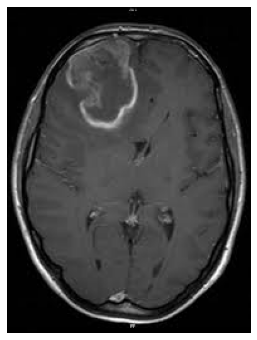

In [64]:
plt.figure(figsize=(6,6))
imgg=plt.imread('/content/Y92.jpg')
plt.imshow(imgg);
plt.axis('off');

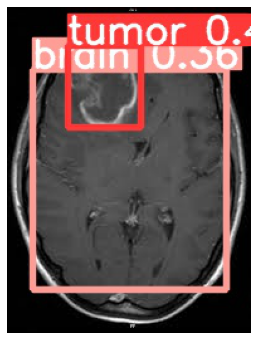

In [63]:
plt.figure(figsize=(6,6))
imgg=plt.imread('/content/yolov5/runs/detect/exp2/Y92.jpg')
plt.imshow(imgg);
plt.axis('off');


#Save Model

In [34]:
os.mkdir('/content/drive/MyDrive/MachineLearing/tumor_Object_Detection/trained_model')

In [38]:
shutil.make_archive('trained_model','zip','/content/yolov5/runs')

'/content/yolov5/trained_model.zip'

In [39]:
shutil.copy('/content/yolov5/trained_model.zip','/content/drive/MyDrive/MachineLearing/tumor_Object_Detection/trained_model')

'/content/drive/MyDrive/MachineLearing/tumor_Object_Detection/trained_model/trained_model.zip'